<a href="https://colab.research.google.com/github/Niyati-C/Niyati-blog/blob/master/minor_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collaborative filtering based movie recommender for large datasets

Dataset-

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix


In [2]:
df_movies= pd.read_csv("movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_ratings= pd.read_csv("ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


# New Section

In [4]:
len(df_ratings)

9718893

In [5]:
df_movies.drop('genres', axis='columns', inplace=True)
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
df= pd.merge(df_ratings, df_movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1.147880e+09,Pulp Fiction (1994)
1,3,296,5.0,1.439474e+09,Pulp Fiction (1994)
2,4,296,4.0,1.573939e+09,Pulp Fiction (1994)
3,5,296,4.0,8.307862e+08,Pulp Fiction (1994)
4,7,296,4.0,8.354447e+08,Pulp Fiction (1994)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df.describe()

,userId,movieId,rating,timestamp
count,9.718893e+06,9.718893e+06,9.718893e+06,9.718892e+06
mean,3.171712e+04,2.157894e+04,3.529131e+00,1.216432e+09
std,1.812599e+04,3.945794e+04,1.063645e+00,2.269639e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.622500e+04,1.197000e+03,3.000000e+00,1.013445e+09
50%,3.172000e+04,2.953000e+03,3.500000e+00,1.198826e+09
75%,4.723100e+04,8.641000e+03,4.000000e+00,1.447707e+09
max,6.307300e+04,2.091630e+05,5.000000e+00,1.574328e+09


In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Pretty Ugly People (2009)                              5.0
Atlantic Records: The House That Ahmet Built (2007)    5.0
You Cast A Spell On Me (2015)                          5.0
Seduction by the Sea (1963)                            5.0
Secrets of the Solar System (2015)                     5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 31689
Shawshank Redemption, The (1994)    31526
Pulp Fiction (1994)                 30923
Silence of the Lambs, The (1991)    28742
Matrix, The (1999)                  28236
Name: rating, dtype: int64

In [11]:
ratings_new= pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_new.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.072464
#1 Cheerleader Camp (2010),1.250000
#Female Pleasure (2018),3.500000
#FollowMe (2019),0.500000
#Horror (2015),1.583333


In [12]:
ratings_new['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings_new.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Forrest Gump (1994),4.042712,31689
"Shawshank Redemption, The (1994)",4.418559,31526
Pulp Fiction (1994),4.187126,30923
"Silence of the Lambs, The (1991)",4.143605,28742
"Matrix, The (1999)",4.148144,28236


In [13]:
len(ratings_new)

46047

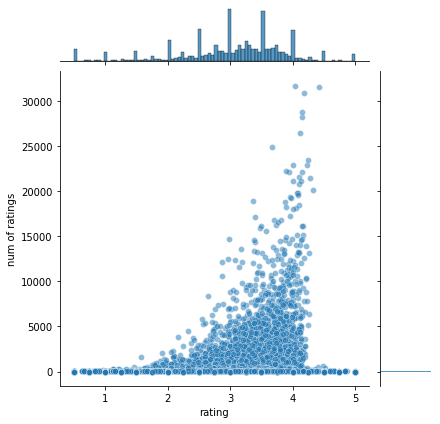

In [14]:
sns.jointplot(x='rating',y='num of ratings', data=ratings_new, alpha=0.5)

In [15]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [16]:
movies_users=df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
mat_movies_users= csr_matrix(movies_users)

ValueError: ignored